<center> <font size=6> Kaggle challenge </font> </center>
<center> <i> GroudTruth Team </i> </center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Information-about-the-dataset" data-toc-modified-id="Information-about-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Information about the dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-Features" data-toc-modified-id="Dataset-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset Features</a></span></li><li><span><a href="#Class-Labels-(8-Classes)" data-toc-modified-id="Class-Labels-(8-Classes)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Class Labels (8 Classes)</a></span></li><li><span><a href="#Profile-Report" data-toc-modified-id="Profile-Report-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Profile Report</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#NA-Cleaning" data-toc-modified-id="NA-Cleaning-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>NA Cleaning</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Date</a></span><ul class="toc-item"><li><span><a href="#Regex-parsing-for-date-extraction" data-toc-modified-id="Regex-parsing-for-date-extraction-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Regex parsing for date extraction</a></span></li><li><span><a href="#Applying-transformation-to-the-dataset" data-toc-modified-id="Applying-transformation-to-the-dataset-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Applying transformation to the dataset</a></span></li><li><span><a href="#Creating-date-features" data-toc-modified-id="Creating-date-features-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Creating date features</a></span></li></ul></li><li><span><a href="#Categorical-encoding" data-toc-modified-id="Categorical-encoding-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Categorical encoding</a></span><ul class="toc-item"><li><span><a href="#org--&gt;-Target-Encoding" data-toc-modified-id="org-->-Target-Encoding-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>org -&gt; Target Encoding</a></span></li><li><span><a href="#tld--&gt;-Target-Encoding" data-toc-modified-id="tld-->-Target-Encoding-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>tld -&gt; Target Encoding</a></span></li><li><span><a href="#mail_type--&gt;-One-Hot-Encoding" data-toc-modified-id="mail_type-->-One-Hot-Encoding-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>mail_type -&gt; One-Hot Encoding</a></span></li></ul></li><li><span><a href="#Dropping-classes" data-toc-modified-id="Dropping-classes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Dropping classes</a></span></li></ul></li><li><span><a href="#Final-dataset-overview" data-toc-modified-id="Final-dataset-overview-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final dataset overview</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#For-one-class-first" data-toc-modified-id="For-one-class-first-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>For one class first</a></span><ul class="toc-item"><li><span><a href="#Splitting-train-/-test" data-toc-modified-id="Splitting-train-/-test-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Splitting train / test</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Prediction</a></span></li></ul></li></ul></li></ul></div>

# Import modules

In [65]:
import os

import numpy as np

import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import xgboost as xgb

# Import data

In [2]:
os.listdir()

['skeleton_code_ml.py',
 'LICENSE',
 'profile_report.html',
 'sample_submission_ml.csv',
 '2EL1730-ML-Kaggle_Challenge_Description.pdf',
 'test_ml.csv',
 'README.md',
 'train_ml.csv',
 '.gitignore',
 '.ipynb_checkpoints',
 '2EL1730-ML-Kaggle_Challenge_Instructions.pdf',
 '.git',
 'kaggle_challenge.ipynb']

In [3]:
df = pd.read_csv('train_ml.csv').drop(columns=['Unnamed: 0'])
df_test = pd.read_csv('test_ml.csv').drop(columns=['Unnamed: 0'])

df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39671 entries, 0 to 39670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39671 non-null  object 
 1   org               37994 non-null  object 
 2   tld               37992 non-null  object 
 3   ccs               39671 non-null  int64  
 4   bcced             39671 non-null  int64  
 5   mail_type         39573 non-null  object 
 6   images            39671 non-null  int64  
 7   urls              39671 non-null  int64  
 8   salutations       39671 non-null  int64  
 9   designation       39671 non-null  int64  
 10  chars_in_subject  39660 non-null  float64
 11  chars_in_body     39671 non-null  int64  
 12  updates           39671 non-null  int64  
 13  personal          39671 non-null  int64  
 14  promotions        39671 non-null  int64  
 15  forums            39671 non-null  int64  
 16  purchases         39671 non-null  int64 

# Information about the dataset

## Dataset Features

- date - unix style date format, date-time on which the email was received, e.g. Sat, 2 Jul 2016 11:02:58 +0530
- org - organisation of the sender, e.g. centralesupelec, facebook, and google.
- tld - top level domain of the organisation, eg. com, ac.in, fr, and org.
- ccs - number of emails cced with this email, e.g. 0, 2, and 10.
- bcced - is the receiver bcc'd in the email. Can take two values: 0 or 1.
- mail_type - type of the mail body, e.g. text/plain and text/html.
- images - number of images in the mail body, e.g. 0, 1, and 100.
- urls - number of urls in the mail body, e.g. 0, 1, and 50.
- salutations - is salutation used in the email? Either 0 or 1.
- designation - is designation of the sender mentioned in the email. Either 0 or 1.
- chars_in_subject - number of characters in the mail subject, e.g. 0, 1, and 10.
- chars_in_body - number of characters in the mail body, e.g. 10 and 10000.
- labels - last eight columns represent eight classes, 0 means that label is not present for this row and 1 means that label is present, multiple label columsn can be 1. Label columns are only present in train.csv. test.csv has features only.

## Class Labels (8 Classes)
- updates
- personal
- promotions
- forums
- purchases
- travel
- spam
- social

In [5]:
df.isnull().sum()

date                   0
org                 1677
tld                 1679
ccs                    0
bcced                  0
mail_type             98
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      11
chars_in_body          0
updates                0
personal               0
promotions             0
forums                 0
purchases              0
travel                 0
spam                   0
social                 0
dtype: int64

## Profile Report

In [6]:
if False: # set to True to generate a new report
    profile = ProfileReport(df, title='Profiling Report')
    profile.to_file("profile_report.html")

# Data Analysis

In [7]:
df.columns

Index(['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social'],
      dtype='object')

In [8]:
list_classes = ['updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social']

In [9]:
df[list_classes].idxmax(axis=1).value_counts()

personal      21767
updates       14377
promotions     1747
forums         1361
social          419
dtype: int64

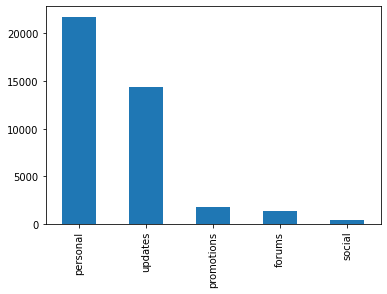

In [10]:
df[list_classes].idxmax(axis=1).value_counts().plot.bar();

In [11]:
numerical_features = ["ccs", "images", "urls", "chars_in_subject", "chars_in_body"]
df[numerical_features]

,ccs,images,urls,chars_in_subject,chars_in_body
0,0,4,28,47.0,25556
1,0,6,32,46.0,19930
2,0,0,0,21.0,4
3,0,108,171,52.0,96568
4,0,20,166,81.0,95131
...,...,...,...,...,...
39666,0,11,31,32.0,44952
39667,0,0,0,57.0,721
39668,0,0,0,28.0,571
39669,0,27,136,24.0,92847


In [12]:
df[numerical_features].describe()

,ccs,images,urls,chars_in_subject,chars_in_body
count,39671.000000,39671.000000,39671.000000,39660.000000,3.967100e+04
mean,0.378967,9.806332,36.731088,51.442032,2.321781e+05
std,2.530353,440.393286,144.379127,34.142227,2.251044e+06
min,0.000000,0.000000,0.000000,0.000000,4.000000e+00
25%,0.000000,0.000000,4.500000,31.000000,4.903000e+03
50%,0.000000,2.000000,18.000000,43.000000,2.000500e+04
75%,0.000000,9.000000,47.000000,63.000000,4.800100e+04
max,155.000000,83480.000000,21540.000000,528.000000,7.438108e+07


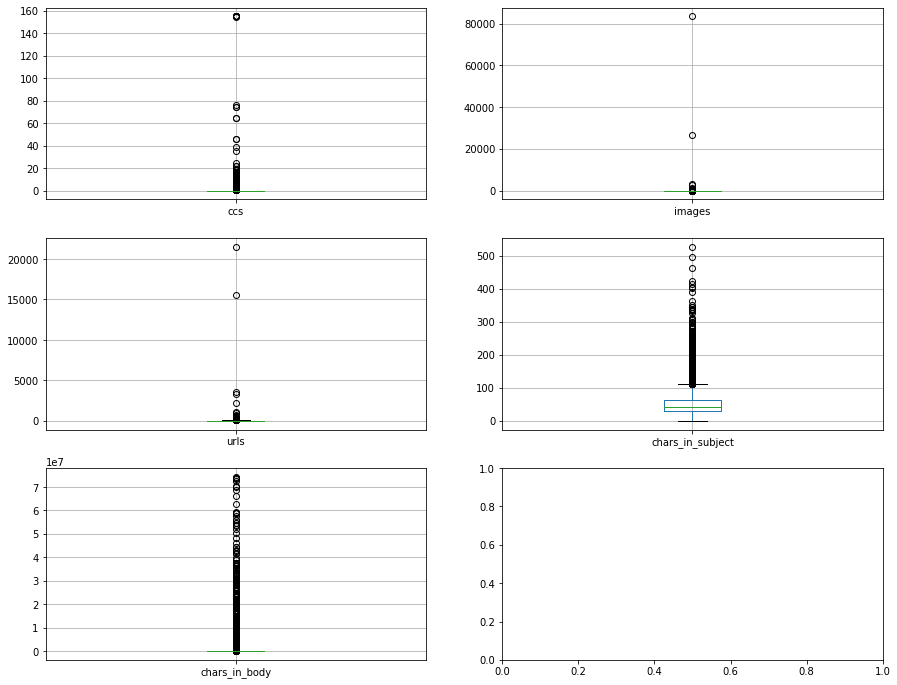

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12), sharey=False)

for idx, (col, ax) in enumerate(zip(numerical_features, axs.ravel())):
    df[numerical_features].boxplot(col, ax=ax)

In [14]:
df['class'] = df[list_classes].idxmax(axis=1)
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social,class
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,25556,0,1,0,0,0,0,0,1,personal
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,...,19930,1,1,0,0,0,0,0,0,updates
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,4,0,1,0,0,0,0,0,1,personal
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,96568,0,0,1,0,0,0,0,0,promotions
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,...,95131,0,1,0,0,0,0,0,1,personal


In [15]:
if False: # set to True to generate figure
    sns.pairplot(df[numerical_features + ['class']], hue='class');

# Preprocessing

## NA Cleaning

In [16]:
len(df)

39671

In [17]:
df.isna().sum()

date                   0
org                 1677
tld                 1679
ccs                    0
bcced                  0
mail_type             98
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      11
chars_in_body          0
updates                0
personal               0
promotions             0
forums                 0
purchases              0
travel                 0
spam                   0
social                 0
class                  0
dtype: int64

In [18]:
len(df.dropna(how='any'))

37939

In [19]:
len(df.dropna(how='any')) / len(df)

0.9563409039348643

In [20]:
df = df.dropna(how='any')
df.isna().sum()

date                0
org                 0
tld                 0
ccs                 0
bcced               0
mail_type           0
images              0
urls                0
salutations         0
designation         0
chars_in_subject    0
chars_in_body       0
updates             0
personal            0
promotions          0
forums              0
purchases           0
travel              0
spam                0
social              0
class               0
dtype: int64

## Date

### Regex parsing for date extraction

For one example:

In [21]:
string = "Mon, 15 Oct 2018 08:03:09 +0000 (UTC)"
pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
ans = re.search(pattern, string)

In [22]:
date = ''.join([ans.group(1), ans.group(2)])
date

'15 Oct 2018 08:03:09+0000'

In [23]:
pd.to_datetime(date)

Timestamp('2018-10-15 08:03:09+0000', tz='UTC')

### Applying transformation to the dataset

Now let's apply the transformation to the dataset:

In [24]:
def format_date(row):
    pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
    
    ans = re.search(pattern, string=row)
    
    if ans:
        if ans.group(1)[1] == ' ':
            return ''.join(['0', ans.group(1), ans.group(2)])
        else:
            return ''.join([ans.group(1), ans.group(2)])
    else:
        return np.nan

In [25]:
df['date'] = pd.to_datetime(df['date'].apply(format_date), utc=True)
df['date']

0       2018-10-15 08:03:09+00:00
1       2014-04-17 16:12:33+00:00
2       2016-10-27 01:36:28+00:00
3       2020-10-16 08:06:31+00:00
4       2015-07-02 10:16:46+00:00
                   ...           
39665   2019-10-16 06:20:00+00:00
39666   2019-10-08 18:58:39+00:00
39668   2017-04-03 13:25:47+00:00
39669   2018-06-14 00:46:51+00:00
39670   2020-04-17 14:06:27+00:00
Name: date, Length: 37939, dtype: datetime64[ns, UTC]

In [26]:
df['date'].iloc[0]

Timestamp('2018-10-15 08:03:09+0000', tz='UTC')

In [27]:
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social,class
0,2018-10-15 08:03:09+00:00,researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,25556,0,1,0,0,0,0,0,1,personal
1,2014-04-17 16:12:33+00:00,no-ip,com,0,0,multipart/alternative,6,32,0,0,...,19930,1,1,0,0,0,0,0,0,updates
2,2016-10-27 01:36:28+00:00,mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,4,0,1,0,0,0,0,0,1,personal
3,2020-10-16 08:06:31+00:00,insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,96568,0,0,1,0,0,0,0,0,promotions
4,2015-07-02 10:16:46+00:00,twitter,com,0,0,multipart/alternative,20,166,0,0,...,95131,0,1,0,0,0,0,0,1,personal


### Creating date features

In [28]:
df['date_day'] = df['date'].dt.date
df['date_day']

0        2018-10-15
1        2014-04-17
2        2016-10-27
3        2020-10-16
4        2015-07-02
            ...    
39665    2019-10-16
39666    2019-10-08
39668    2017-04-03
39669    2018-06-14
39670    2020-04-17
Name: date_day, Length: 37939, dtype: object

In [29]:
df['date_day'].value_counts()

2017-04-07    94
2017-04-06    85
2016-07-06    71
2016-07-08    58
2016-07-09    55
              ..
2013-02-12     1
2013-01-25     1
2013-04-06     1
2013-04-21     1
2012-09-11     1
Name: date_day, Length: 2847, dtype: int64

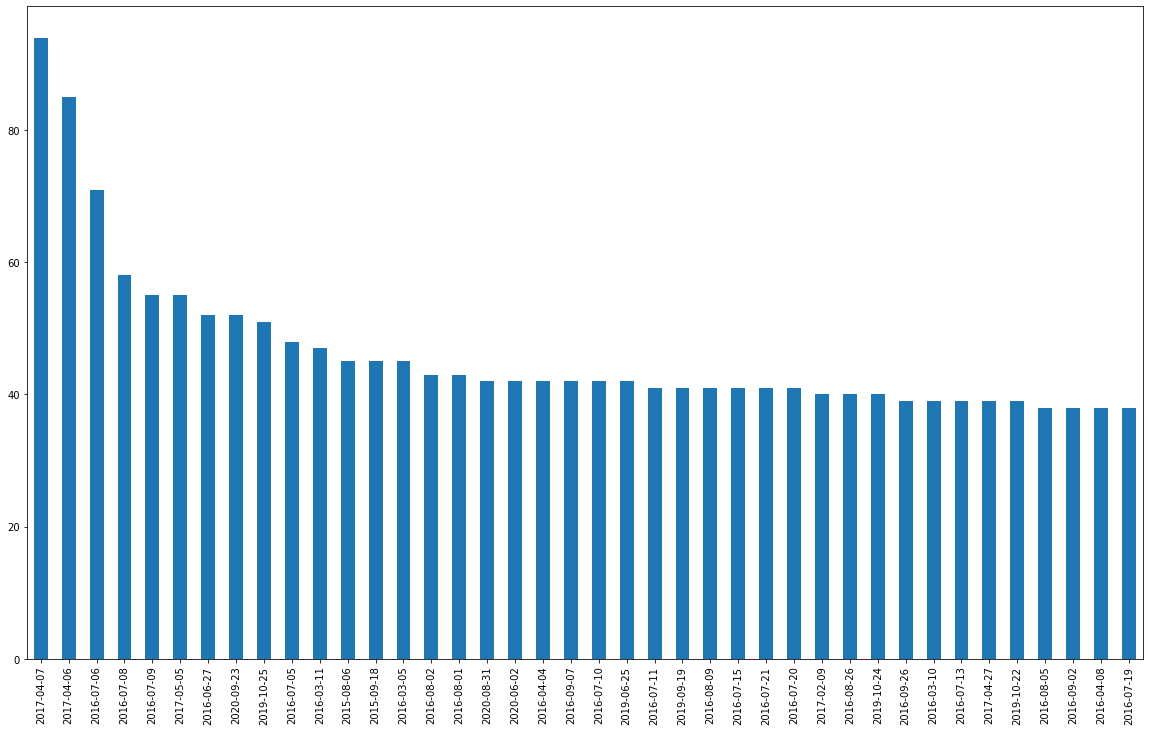

In [30]:
plt.figure(figsize=(20,12))
df['date_day'].value_counts().head(40).plot.bar();

In [31]:
df['date_day'] = df['date'].dt.date
df['date_day']

0        2018-10-15
1        2014-04-17
2        2016-10-27
3        2020-10-16
4        2015-07-02
            ...    
39665    2019-10-16
39666    2019-10-08
39668    2017-04-03
39669    2018-06-14
39670    2020-04-17
Name: date_day, Length: 37939, dtype: object

In [32]:
df['month'] = df['date'].dt.month
df['month']

0        10.0
1         4.0
2        10.0
3        10.0
4         7.0
         ... 
39665    10.0
39666    10.0
39668     4.0
39669     6.0
39670     4.0
Name: month, Length: 37939, dtype: float64

In [33]:
df['weekday'] = df['date'].dt.weekday
df['weekday']

0        0.0
1        3.0
2        3.0
3        4.0
4        3.0
        ... 
39665    2.0
39666    1.0
39668    0.0
39669    3.0
39670    4.0
Name: weekday, Length: 37939, dtype: float64

In [34]:
df['hour'] = df['date'].dt.hour
df['hour']

0         8.0
1        16.0
2         1.0
3         8.0
4        10.0
         ... 
39665     6.0
39666    18.0
39668    13.0
39669     0.0
39670    14.0
Name: hour, Length: 37939, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37939 entries, 0 to 39670
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              37893 non-null  datetime64[ns, UTC]
 1   org               37939 non-null  object             
 2   tld               37939 non-null  object             
 3   ccs               37939 non-null  int64              
 4   bcced             37939 non-null  int64              
 5   mail_type         37939 non-null  object             
 6   images            37939 non-null  int64              
 7   urls              37939 non-null  int64              
 8   salutations       37939 non-null  int64              
 9   designation       37939 non-null  int64              
 10  chars_in_subject  37939 non-null  float64            
 11  chars_in_body     37939 non-null  int64              
 12  updates           37939 non-null  int64              
 13  p

## Categorical encoding

### org -> Target Encoding

In [36]:
len(df['org'].unique())

964

In [37]:
df['org'].value_counts().nlargest(5)

iiitd          8930
google         2201
usebackpack    1699
amazon         1523
quora          1241
Name: org, dtype: int64

In [38]:
means_by_org = df.groupby('org')[list_classes].mean()
means_by_org.head(3)

,updates,personal,promotions,forums,purchases,travel,spam,social
org,,,,,,,,
000webhost,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
10xrecruit,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
126,0.0,1.0,0.0,0.012821,0.0,0.0,0.0,0.0


In [39]:
list_org_target_classes = []
for col in list_classes:
    new_col_name = f'org_target_{col}'
    
    list_org_target_classes.append(new_col_name)
    df[new_col_name] = df['org'].map(means_by_org[col])

df[list_org_target_classes].head()

,org_target_updates,org_target_personal,org_target_promotions,org_target_forums,org_target_purchases,org_target_travel,org_target_spam,org_target_social
0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000
1,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,0.160156,0.613281,0.492188,0.0,0.003906,0.0,0.007812,0.351562
3,0.218750,0.062500,0.781250,0.0,0.000000,0.0,0.000000,0.000000
4,0.001850,0.828862,0.002775,0.0,0.000000,0.0,0.000000,0.965772


In [40]:
df = df.drop(columns=['org'])

### tld -> Target Encoding

In [41]:
len(df['tld'].unique())

268

In [42]:
df['tld'].value_counts()

com                      17668
ac.in                     8992
in                        1816
org                       1734
fr                        1044
                         ...  
gitguardian.com              1
foursquare.com               1
ch                           1
scientific-direct.net        1
swiggy.in                    1
Name: tld, Length: 268, dtype: int64

In [43]:
means_by_tld = df.groupby('tld')[list_classes].mean()
means_by_tld.head(3)

,updates,personal,promotions,forums,purchases,travel,spam,social
tld,,,,,,,,
21cf.com,0.5,1.000000,0.5,0.0,0.0,0.0,0.0,0.0
33mail.com,1.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0
4shared.com,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
list_tld_target_classes = []
for col in list_classes:
    new_col_name = f'tld_target_{col}'
    
    list_tld_target_classes.append(new_col_name)
    df[new_col_name] = df['tld'].map(means_by_tld[col])

df[list_tld_target_classes].head()

,tld_target_updates,tld_target_personal,tld_target_promotions,tld_target_forums,tld_target_purchases,tld_target_travel,tld_target_spam,tld_target_social
0,0.327731,0.911765,0.063025,0.000000,0.000000,0.000000,0.004202,0.563025
1,0.475379,0.720851,0.195947,0.065259,0.003396,0.001868,0.002377,0.202570
2,0.017241,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.982759
3,0.704545,0.329545,0.284091,0.000000,0.238636,0.000000,0.000000,0.000000
4,0.475379,0.720851,0.195947,0.065259,0.003396,0.001868,0.002377,0.202570


In [45]:
list_tld_target_classes

['tld_target_updates',
 'tld_target_personal',
 'tld_target_promotions',
 'tld_target_forums',
 'tld_target_purchases',
 'tld_target_travel',
 'tld_target_spam',
 'tld_target_social']

In [46]:
df = df.drop(columns=['tld'])

### mail_type -> One-Hot Encoding

In [47]:
len(df['mail_type'].unique())

11

In [48]:
df['mail_type'].value_counts()

multipart/alternative    27505
text/html                 5306
multipart/mixed           3178
text/plain                 956
multipart/related          892
text/html                   40
multipart/signed            23
Multipart/Mixed             21
multipart/report            10
Text/Html                    6
Multipart/Alternative        2
Name: mail_type, dtype: int64

In [49]:
pd.get_dummies(df['mail_type'], prefix='mail_type_').head(3)

,mail_type__Multipart/Alternative,mail_type__Multipart/Mixed,mail_type__Text/Html,mail_type__multipart/alternative,mail_type__multipart/mixed,mail_type__multipart/related,mail_type__multipart/report,mail_type__multipart/signed,mail_type__text/html,mail_type__text/html,mail_type__text/plain
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0


In [50]:
df = pd.concat([df, pd.get_dummies(df['mail_type'], prefix='mail_type_')], axis=1).drop(columns=['mail_type'])
df.head(3)

,date,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,...,mail_type__Multipart/Mixed,mail_type__Text/Html,mail_type__multipart/alternative,mail_type__multipart/mixed,mail_type__multipart/related,mail_type__multipart/report,mail_type__multipart/signed,mail_type__text/html,mail_type__text/html,mail_type__text/plain
0,2018-10-15 08:03:09+00:00,0,0,4,28,0,1,47.0,25556,0,...,0,0,1,0,0,0,0,0,0,0
1,2014-04-17 16:12:33+00:00,0,0,6,32,0,0,46.0,19930,1,...,0,0,1,0,0,0,0,0,0,0
2,2016-10-27 01:36:28+00:00,0,0,0,0,0,0,21.0,4,0,...,0,0,0,1,0,0,0,0,0,0


## Dropping classes

In [51]:
cols_to_drop = ["date", "date_day", "class"]

df = df.drop(columns=cols_to_drop)

# Final dataset overview

In [52]:
df.head(3).T

,0,1,2
ccs,0.000000,0.000000,0.000000
bcced,0.000000,0.000000,0.000000
images,4.000000,6.000000,0.000000
urls,28.000000,32.000000,0.000000
salutations,0.000000,0.000000,0.000000
designation,1.000000,0.000000,0.000000
chars_in_subject,47.000000,46.000000,21.000000
chars_in_body,25556.000000,19930.000000,4.000000
updates,0.000000,1.000000,0.000000
personal,1.000000,1.000000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37939 entries, 0 to 39670
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ccs                               37939 non-null  int64  
 1   bcced                             37939 non-null  int64  
 2   images                            37939 non-null  int64  
 3   urls                              37939 non-null  int64  
 4   salutations                       37939 non-null  int64  
 5   designation                       37939 non-null  int64  
 6   chars_in_subject                  37939 non-null  float64
 7   chars_in_body                     37939 non-null  int64  
 8   updates                           37939 non-null  int64  
 9   personal                          37939 non-null  int64  
 10  promotions                        37939 non-null  int64  
 11  forums                            37939 non-null  int64  
 12  purc

# Model

## For one class first

In [54]:
k = 0
print(f"Current class: {list_classes[k]}")

Current class: updates


### Splitting train / test

In [55]:
X = df.drop(columns=list_classes)
y = df[list_classes[k]]

In [62]:
y

0        0
1        1
2        0
3        0
4        0
        ..
39665    1
39666    0
39668    0
39669    1
39670    1
Name: updates, Length: 37939, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

In [57]:
y_test.sum(axis=0) / (y_train.sum(axis=0) + y_test.sum(axis=0))

0.2

For XGBoost:

In [58]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

### Prediction

In [64]:
model = xgb.XGBClassifier(n_estimators=100)


model.fit(X_train, y_train)

/Users/Tony/opt/anaconda3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_preds = model.predict(X_test)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4984
           1       0.92      0.90      0.91      2604

    accuracy                           0.94      7588
   macro avg       0.94      0.93      0.93      7588
weighted avg       0.94      0.94      0.94      7588

